In [8]:
from section_divide import _get_section
from arrange_score import get_notes_score
from pprint import pprint
import matplotlib.pyplot as plt
import os
import numpy as np
from classes.types import HoldType, JudgeType, NotesType
from classes.types.HoldType import HoldType

# notes_score = get_notes_score("./data/m155.json")
# for note in notes_score:
#     if abs(note.y - 97.25) < 0.0001:
#         print(note)
#         break


import glob
import os
songs_file = glob.glob("./../proseka/datas/*.json")
songs_file = [f for f in songs_file if "155" in f or "318" in f]
print(songs_file[:5])

for song_file_path in songs_file[:3]:
    file_name = os.path.basename(song_file_path)
    sections = _get_section(song_file_path)
    # for note in sections[257]:
    #     print(note)

    # assert (sections[257][0].type ) == NotesType.HOLD, f"{sections[257][0]}"
    dir_path = f"./data/_vis-result/notes/{file_name}"
    # pprint(sections)
    try:
        os.mkdir(dir_path)
    except FileExistsError:
        pass

    for j,section_j in enumerate(sections):
        # dir = f"{dir_path}/length-{len(section_j)}"
        # try:
        #     os.mkdir(dir)
        # except FileExistsError:
        #     pass
        
        ys = np.array([note.y for note in section_j])
        min_y = ys.min()
        
        # normal
        xs = np.array([note.x for note in section_j if note.type != NotesType.HOLD])
        ys = np.array([note.y for note in section_j if note.type != NotesType.HOLD], dtype="float64")
        plt.scatter(xs,ys, color="b")
        
        hold_x_by_hole:dict[int, list[int]] = dict()
        hold_y_by_hole:dict[int, list[float]] = dict()
        for note in section_j:
            if note.type != NotesType.HOLD:
                continue
            
            holdx = hold_x_by_hole.get(note.hole, [])
            holdx.append(note.x)
            hold_x_by_hole[note.hole] = holdx
            
            holdy = hold_y_by_hole.get(note.hole, [])
            holdy.append(note.y)
            
            hold_y_by_hole[note.hole] = holdy
            # hold_x.append(note.x)
            # hold_y.append(note.y)
            
            if note.hold_type == HoldType.END:
                # plt.plot(hold_x, np.array(hold_y) - min_y, color="g",  marker="o")
                # plt.plot(hold_x, hold_y, color="g",  marker="o")
                
                plt.plot(hold_x_by_hole[note.hole], hold_y_by_hole[note.hole], color="g",  marker="o")
                hold_x_by_hole[note.hole] = []
                hold_y_by_hole[note.hole] = []
                continue
        
        for hx, hy in zip(hold_x_by_hole.values(), hold_y_by_hole.values()):
            if len(hx) != 0 and len(hy) != 0:
                plt.plot(hx, hy, color="g",  marker="o")
            

        plt.xlim([-0.3,12.3])
        plt.savefig(f"{dir_path}/{j}.png")
        plt.close()
        if len(section_j) == 66:
            for note in section_j:
                print(note)
        
        # break


['./../proseka/datas/song318.json', './../proseka/datas/song155.json']
Note describe:
	pos: (x, y) = (1, 97.25)
	width: 5
	note type: HOLD START: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (6, 97.25)
	width: 5
	note type: HOLD START: hole 1
	how judge: OFF
Note describe:
	pos: (x, y) = (0, 97.2578)
	width: 5
	note type: HOLD MIDDLE: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (5, 97.2578)
	width: 5
	note type: HOLD MIDDLE: hole 1
	how judge: OFF
Note describe:
	pos: (x, y) = (2, 97.2656)
	width: 5
	note type: HOLD MIDDLE: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (7, 97.2656)
	width: 5
	note type: HOLD MIDDLE: hole 1
	how judge: OFF
Note describe:
	pos: (x, y) = (0, 97.2734)
	width: 5
	note type: HOLD MIDDLE: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (5, 97.2734)
	width: 5
	note type: HOLD MIDDLE: hole 1
	how judge: OFF
Note describe:
	pos: (x, y) = (2, 97.2812)
	width: 5
	note type: HOLD MIDDLE: hole 0
	how judge: OFF
Note describe:
	pos: (x, y

# そのまま出力

Note describe:
	pos: (x, y) = (1, 97.25)
	width: 5
	note type: HOLD START: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (6, 97.25)
	width: 5
	note type: HOLD START: hole 1
	how judge: OFF
Note describe:
	pos: (x, y) = (1, 97.25)
	width: 5
	note type: HOLD START: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (1, 97.25)
	width: 5
	note type: HOLD START: hole 0
	how judge: OFF
Note describe:
	pos: (x, y) = (6, 97.25)
	width: 5
	note type: HOLD START: hole 1
	how judge: OFF


/tmp/ipykernel_2214/480711019.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(xs), np.array(ys)


KeyboardInterrupt: 

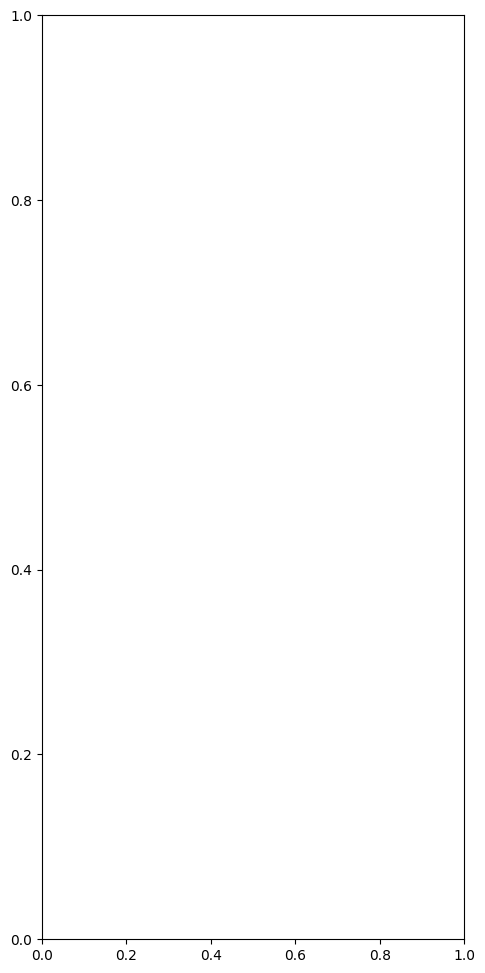

In [7]:
from section_divide import _get_section
from arrange_score import get_notes_score
from pprint import pprint
import matplotlib.pyplot as plt
import os
import numpy as np
from classes import Note
from classes.types import HoldType, JudgeType, NotesType
from classes.types.HoldType import HoldType
import random

notes_score = get_notes_score("./data/m155.json")
for note in notes_score:
    if abs(note.y - 97.25) < 0.0001:
        print(note)
        break


sections = _get_section("./data/m155.json")

assert (sections[257][0].type ) == NotesType.HOLD, f"{sections[257][0]}"

dir_path = f"./data/_vis-result/notes"
try:
    os.mkdir(dir_path)
except FileExistsError:
    pass

dir = f"{dir_path}/comp"
try:
    os.mkdir(dir)
except FileExistsError:
    pass


def get_xys_not_hold(section: list[Note]):
    xs = np.array([note.x for note in section if note.type != NotesType.HOLD])
    ys = np.array([note.y for note in section if note.type != NotesType.HOLD], dtype="float64")
    return xs, ys

def get_xys_hold(section: list[Note]):
    xs = []
    ys = []
    hold_x = []
    hold_y = []
    for note in section:
        if note.type != NotesType.HOLD:
            continue
        
        if note.hold_type == HoldType.END:
            xs.append(hold_x)
            ys.append(hold_y)
            hold_x = []
            hold_y = []
            continue

        hold_x.append(note.x)
        hold_y.append(note.y)
    
    if len(hold_x) != 0:
        xs.append(hold_x)
        ys.append(hold_y)
    
    return np.array(xs), np.array(ys)

dir_item = f"{dir}/item2"
try:
    os.mkdir(dir_item)
except FileExistsError:
    pass

for i,section_i in enumerate(sections):
    # dir_i = f"{dir}/{i}"
    # try:
    #     os.mkdir(dir_i)
    # except FileExistsError:
    #     pass

    for j,section_j in enumerate(sections):
        if i == j:
            continue
        if random.random() < 1 - 1/300:
            continue
        # if i == 4 and j <= 13:
        #     continue
        
        fig, axes = plt.subplots(1, 2, figsize = (6*8, 4.8*4))
        # normal
        xs, ys = get_xys_not_hold(section_i)
        axes[0].scatter(xs,ys, color="b")

        hold_x, hold_y = get_xys_hold(section_i)
        for xs, ys in zip(hold_x, hold_y):
            axes[0].plot(xs, ys, color="g",  marker="o")

        axes[0].set_xlim([-0.3,12.3])
        axes[0].set_title(f"index : {i}")

        # normal
        xs, ys = get_xys_not_hold(section_j)
        axes[1].scatter(xs,ys, color="b")

        hold_x, hold_y  = get_xys_hold(section_j)
        for xs, ys in zip(hold_x, hold_y):
            axes[1].plot(xs, ys, color="g",  marker="o")

        axes[1].set_xlim([-0.3,12.3])
        axes[1].set_title(f"index : {j}")
        # plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
        file_name = f"{i}-{j}.png"
        fig.savefig(f"{dir_item}/{file_name}")
        # else:
        #     fig.savefig(f"{dir_i}/{file_name}")
        plt.close()
    
    # break
